In [1]:
import re
import string

import nltk
from nltk import word_tokenize, ngrams, everygrams
from nltk.probability import *
from nltk.util import unique_list
from nltk import bigrams
from nltk import trigrams
from nltk.corpus import stopwords
from nltk.corpus import udhr 

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import os
import gensim

In [88]:
import numpy
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
import sys

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils

from sklearn.manifold import TSNE

## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [3]:
current_dir =os.getcwd()

In [4]:
global word2vec 
word2vec = gensim.models.KeyedVectors.load_word2vec_format(current_dir+"/GoogleNews-vectors-negative300.bin.gz", binary=True)

In [5]:
#kaggle
df = pd.read_csv(current_dir+'/'+'color-concrete-objects.csv')
df1 = pd.read_csv(current_dir+'/'+'literal-nonliteral-uses.csv')

In [6]:
df1.columns
df.columns

Index(['object', 'color'], dtype='object')

In [7]:
df2=df1[['color', 'noun']]
#df = df.merge(df1, left_on)
df = df.rename(index=str, columns={"object":"noun"})

In [8]:
col=["color", "noun"]
df=df.reindex(columns=col)#swap columns
df2=df2.append([df]) #concatenate

df2=df2.sample(frac=1).reset_index(drop=True) #shuffle
print("Dimensions=", df2.shape)
#print(type(df2))
df2.head(30).transpose()

Dimensions= (394, 2)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
color,black,white,white,green,white,black,white,red,blue,green,...,white,black,green,green,black,red,brown,white,black,green
noun,sky,smile,cheese,earth,worker,vote,cloud,building,thing,electricity,...,sand,athlete,tea,weed,plate,signal,colour,light,mass,head


In [9]:
def get_embeddings(dicts):
    f = open(current_dir+'/glove.6B.100d.txt')
    for line in f:
    #for (color, noun) in df2.items():
        #print(color)
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        #for (w in cl:
        #print(noun)
        #dict[noun] = model[noun]
        #dict[color]=model[color]
        dicts[word]=coefs   
    f.close()
    print('Loaded %s word vectors.' % len(dicts))
    return dict

In [10]:
def get_W2V_Gensim(ana_list, embeddings):
     
    for (task, samples) in ana_list.items():
        print('Analogy task= '+ task)
        print('total records in task %s = %s ' %(task, len(samples)))
        ground_truth = []
        pred = []
        #for i in range(len(samples)):
        for i in range(15):
            if(samples[i][0]!=':' and samples[i][0]!='//'):
                print(samples[i])
                word_1, word_2 = [w for w in samples[i]]
                result = embeddings.most_similar(positive=[word_2, word_1],topn=1)
                ground_truth.append(word_1)
                pred.append(result[0][0]) 
        ground_truth = [w.lower() for w in ground_truth]
        pred = [w.lower() for w in pred]
        accuracy  = accuracy_score(ground_truth, pred)
        print('Accuracy = %.2f'%(accuracy*100))

In [11]:
color_text = '\n'.join(df2.color)
nouns_text = '\n'.join(df2.noun)
corpus_text=color_text+' '+nouns_text
sentences = corpus_text.split('\n')
sentences = [line.lower().split(' ') for line in sentences]
#sentences

In [12]:
from gensim.models import Word2Vec

In [13]:
model = Word2Vec(sentences, size=100, window=5, min_count=3, workers=4)

In [14]:
vectors = model.wv
vectors['grey']

array([-4.76248795e-03, -4.73647960e-04,  1.73308433e-03,  3.02668847e-03,
       -4.94428832e-06,  3.99139104e-03,  3.44362063e-03, -4.40278603e-03,
       -2.03498895e-03, -1.78994681e-03,  2.12828338e-04, -1.60012045e-03,
        2.35570781e-03,  4.52876650e-03, -3.53942532e-03, -1.64229400e-03,
        2.61113048e-04, -2.38649268e-03, -1.92720490e-03,  7.68810569e-04,
       -3.37483385e-03,  1.67870068e-03,  1.51107437e-03,  8.33248720e-04,
       -1.49923004e-03,  2.90866895e-03, -3.80285364e-03,  1.81305886e-03,
       -4.16734442e-03, -2.12036262e-04, -2.61920365e-03,  9.04015324e-05,
       -1.25056563e-03,  3.84765631e-03, -2.70682084e-03,  6.26832305e-04,
        3.03359586e-03,  2.93887244e-03, -1.11647963e-03,  2.79507833e-03,
        3.28806404e-04, -1.42068905e-03,  3.47334146e-03, -1.94087531e-03,
        3.82976170e-04, -3.56402504e-03, -2.12308762e-04, -4.08099359e-03,
        4.55634948e-03, -6.68392982e-04,  2.73339357e-03,  5.54740371e-04,
       -2.77576852e-03,  

In [15]:
global embeddings
embeddings = dict()
#get_embeddings(dict, vectors)
get_embeddings(embeddings)
#word2vec(df2)
#get_W2V_Gensim(df2, word2vec)
#print(word2vec['red'])
#print(embeddings['grey'])

Loaded 400000 word vectors.


dict

In [16]:
print([df2[v] for (v,k) in df2.items()])
df2=df2.append([df])

[0       black
1       white
2       white
3       green
4       white
5       black
6       white
7         red
8        blue
9       green
10       blue
11       blue
12     yellow
13      brown
14      white
15      brown
16       blue
17        red
18       blue
19      white
20      white
21      black
22      green
23      green
24      black
25        red
26      brown
27      white
28      black
29      green
        ...  
364     white
365     white
366     black
367       red
368       red
369      grey
370     black
371     white
372     brown
373     black
374     black
375     green
376     white
377     brown
378     black
379      blue
380     white
381     black
382     white
383     black
384     white
385     white
386     green
387     white
388     green
389      blue
390      grey
391     white
392    yellow
393     green
Name: color, Length: 394, dtype: object, 0              sky
1            smile
2           cheese
3            earth
4           worker
5        

In [17]:
#filename = "wonderland.txt"
#filename = current_dir+'/'+"wonderland5.txt"
filename = current_dir+'/'+"wonderland2.txt"
raw_text = open(filename).read()
raw_text = raw_text.lower()
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)
seq_length = 100
dataX = []
dataY = []

Total Characters:  10985
Total Vocab:  42


In [18]:
def get_character_model():
    

    
    # prepare the dataset of input to output pairs encoded as integers

    for i in range(0, n_chars - seq_length, 1):
        seq_in = raw_text[i:i + seq_length]
        seq_out = raw_text[i + seq_length]
        dataX.append([char_to_int[char] for char in seq_in])
        dataY.append(char_to_int[seq_out])
    n_patterns = len(dataX)
    print ("Total Patterns: ", n_patterns)
    # reshape X to be [samples, time steps, features]
    X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
    # normalize
    X = X / float(n_vocab)
    # one hot encode the output variable
    y = np_utils.to_categorical(dataY)
    # define the LSTM model
    model = Sequential()
    model.add(LSTM(24, input_shape=(X.shape[1], X.shape[2]), return_sequences=True)) #maybe use convolution networks here instead of adding more LSTM
    model.add(Dropout(0.1))
    #model.add(LSTM(12, input_shape=(X.shape[1], X.shape[2]), return_sequences=True)) #maybe use convolution networks here instead of adding more LSTM
    #model.add(Dropout(0.2))
    model.add(LSTM(24))#this may be dropped for increased speed
    model.add(Dropout(0.1))

    model.add(Dense(y.shape[1], activation='softmax'))#this activation may be done in line 43
    ad = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer=ad)#optimizer='adam')
    # define the checkpoint
    
    filepath="weights-improvement2-{epoch:02d}-{loss:.4f}-bigger.hdf5"
    
    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
    #checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='min')
    callbacks_list = [checkpoint]
    # fit the model
    model.fit(X, y, epochs=1, batch_size=64, callbacks=callbacks_list)
    return model 
df2.head(30).transpose()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
color,black,white,white,green,white,black,white,red,blue,green,...,white,black,green,green,black,red,brown,white,black,green
noun,sky,smile,cheese,earth,worker,vote,cloud,building,thing,electricity,...,sand,athlete,tea,weed,plate,signal,colour,light,mass,head


In [19]:
#char_model = get_character_model()

In [20]:
def get_char_model_training():
    filename ="weights-improvement2-01-3.1145-bigger.hdf5"
    int_to_char = dict((i, c) for i, c in enumerate(chars))
    #filename =current_dir+"/"+"weights-improvement2-214-0.0087-bigger.hdf5"
    char_model.load_weights(filename)
    char_model.compile(loss='categorical_crossentropy', optimizer='adam')
    # pick a random seed
    print(len(dataX))
    start = numpy.random.randint(0, len(dataX)-1)

    pattern = dataX[start]
    print ("Seed:")
    print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
    # generate characters
    for i in range(1000):
        x = numpy.reshape(pattern, (1, len(pattern), 1))
        x = x / float(n_vocab)
        prediction = char_model.predict(x, verbose=0)
        index = numpy.argmax(prediction)
        result = int_to_char[index]
        seq_in = [int_to_char[value] for value in pattern]
        sys.stdout.write(result)
        pattern.append(index)
        pattern = pattern[1:len(pattern)]

In [21]:
#get_char_model_training()

In [22]:
colors_df=pd.read_csv('color_data_final.csv')
colors_df = colors_df.sample(frac=1).reset_index(drop=True)

In [23]:
h = sorted(colors_df.name.str.len().as_matrix())
import numpy as np
import scipy.stats as stats
import pylab as plt

print(colors_df.columns)
print(set(colors_df.name))
#colors_df = colors_df.head(2000)
#h
#type(df2.noun.str)
colors_df

Index(['Unnamed: 0', 'name', 'context', 'code', 'red', 'green', 'blue'], dtype='object')
{'grey', 'brown', 'black', 'white', 'blue', 'red', 'yellow', 'orange', 'green', 'pink'}


,Unnamed: 0,name,context,code,red,green,blue
0,2276,white,en trying catch tailor kept going came place o...,"(255, 255, 255)",255,255,255
1,1660,pink,feather last night going laugh wear ribbons ca...,"(255, 192, 203)",255,192,203
2,23,white,foam,"(255, 255, 255)",255,255,255
3,1655,orange,r clients stock would like certainly enough ju...,"(255, 165, 0)",255,165,0
4,2076,red,one friend wannabe fashionista cell yeah walk ...,"(255, 0, 0)",255,0,0
5,937,brown,ad fact brisk breeze passage stirred fluttered...,"(165, 42, 42)",165,42,42
6,1230,green,hope day susan happy little friends upon play ...,"(0, 255, 0)",0,255,0
7,2638,white,shadow wilds coaxes vapor dusk depart air shak...,"(255, 255, 255)",255,255,255
8,519,black,slave hole,"(0, 0, 0)",0,0,0
9,618,blue,unt moreover thou shalt make tabernacle ten cu...,"(0, 0, 255)",0,0,255


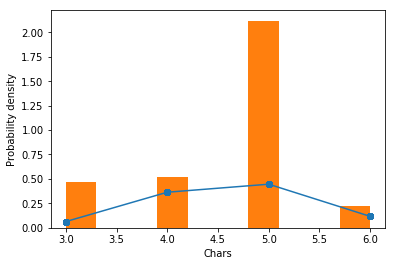

In [24]:

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)      #use this to draw histogram of your data
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()

In [25]:
np.array(h).max()

6

In [26]:
print("Dimensions of data: ", colors_df.shape)
maxlen = np.max([len(x) for x in colors_df.context])
print("Maximum context dimension: ", maxlen)
colors_df.head(3)

Dimensions of data:  (4235, 7)
Maximum context dimension:  165


,Unnamed: 0,name,context,code,red,green,blue
0,2276,white,en trying catch tailor kept going came place o...,"(255, 255, 255)",255,255,255
1,1660,pink,feather last night going laugh wear ribbons ca...,"(255, 192, 203)",255,192,203
2,23,white,foam,"(255, 255, 255)",255,255,255


In [27]:

t =Tokenizer(char_level=True)
#t.fit_on_texts(df2.noun)
t.fit_on_texts(colors_df.context)
tokenized = t.texts_to_sequences(colors_df.context)
padded_names = keras.preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
#type(tokenized)
padded_names[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  7,  1,  9,  5,
       19,  8,  7, 13,  1, 14,  3,  9, 14, 12,  1,  9,  3,  8, 10,  6,  5,
        1, 22,  2, 17,  9,  1, 13,  6,  8,  7, 13,  1, 14,  3, 16,  2,  1,
       17, 10,  3, 14,  2,  1,  6, 10, 11,  1, 13,  3,  5,  5,  3, 15,  7,
        1,  6, 10, 11,  1, 13,  3,  5,  5,  3, 15,  7,  1,  9,  6, 10, 11,
        1,  9,  3,  8, 10,  6,  5,  1, 18,  8, 21,  2], dtype=int32)

In [28]:

one_hot_names = np_utils.to_categorical(padded_names)
num_classes = one_hot_names.shape[-1]
num_classes

28

In [29]:
one_hot_names.shape

(4235, 165, 28)

In [30]:
t.word_index

{' ': 1,
 'a': 3,
 'b': 20,
 'c': 14,
 'd': 11,
 'e': 2,
 'f': 21,
 'g': 13,
 'h': 12,
 'i': 8,
 'j': 25,
 'k': 22,
 'l': 10,
 'm': 16,
 'n': 7,
 'o': 6,
 'p': 17,
 'q': 26,
 'r': 5,
 's': 4,
 't': 9,
 'u': 15,
 'v': 23,
 'w': 18,
 'x': 24,
 'y': 19,
 'z': 27}

In [31]:
#set(df2.color)
set(colors_df.name)

{'black',
 'blue',
 'brown',
 'green',
 'grey',
 'orange',
 'pink',
 'red',
 'white',
 'yellow'}

In [32]:
from keras.utils import np_utils
one_hot_names = np_utils.to_categorical(padded_names)
num_classes = one_hot_names.shape[-1]
print('Number of classes: %s'%(num_classes))
print('One hot bins shape: ', one_hot_names.shape)

Number of classes: 28
One hot bins shape:  (4235, 165, 28)


In [33]:
colors_df=colors_df[['name','context', 'code', 'red', 'green', 'blue']]
colors_df.head(4)

,name,context,code,red,green,blue
0,white,en trying catch tailor kept going came place o...,"(255, 255, 255)",255,255,255
1,pink,feather last night going laugh wear ribbons ca...,"(255, 192, 203)",255,192,203
2,white,foam,"(255, 255, 255)",255,255,255
3,orange,r clients stock would like certainly enough ju...,"(255, 165, 0)",255,165,0


In [34]:
#word2vec.wv(colors_df.context)
length=np.max([len(x) for x in colors_df.context])
print('Maximum context lenght: ',length)

Maximum context lenght:  165


In [35]:
#words = list(word2vec.wv.vocab)
#print(words[:3])

In [36]:
#word2vec.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
#print(result)


In [37]:
all_text=' '.join(colors_df.context)
my_char_list=list(set(all_text))

In [38]:
#create dictionary for the characters to integers
characters = sorted(my_char_list)
dictionary_char_int = dict((c, i) for i, c in enumerate(characters))

#### Summary

In [39]:

number_chars = len(all_text)
number_vocabulary = len(characters)
print ("Total Characters: ", number_chars)
print ("Total Vocab: ", number_vocabulary)

vocab_size = length

# prepare the dataset of input to output pairs encoded as integers
#seq_length = 100
dataX = []
dataY = []
for i in range(len(one_hot_names)):
    #inn = colors_df.iloc[i,1]
    inn = one_hot_names[i]
    #outt = [colors_df.iloc[i,3]/255, colors_df.iloc[i,4]/255, colors_df.iloc[i,5]/255] # normalize values
    #outt = [colors_df.red[i]/255, colors_df.green[i]/255, colors_df.blue[i]/255] # normalize values
    outt = np.column_stack([colors_df.red[i]/255, colors_df.green[i]/255, colors_df.blue[i]/255]) # normalize values
    #np.column_stack([norm(data["red"]), norm(data["green"]), norm(data["blue"])])
    #dataX.append([dictionary_char_int[c] for c in inn])
    dataX.append(inn)
    dataY.append(outt)
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)
dataY = np.column_stack([colors_df.red/255, colors_df.green/255, colors_df.blue/255])
#dataY=np.array(dataY[0])
#one_hot_names=np.array(one_hot_names[0])
#one_hot_names[0]

Total Characters:  356776
Total Vocab:  27
Total Patterns:  4235


In [40]:
#dataY=np.array([dataY[0]])


In [41]:
#print([k for (k,v) in colors_df.items()])
print( colors_df.iloc[0,0])

white


In [42]:
#padd_docs = keras.preprocessing.sequence.pad_sequences(dataX, maxlen=length, padding='post')
#padd_docs[57]
#padd_docs = numpy.reshape(padd_docs, (padd_docs.shape[0], 1, padd_docs.shape[1]))


In [43]:
print('Contexts number: ',length)

Contexts number:  165


In [44]:
model = Sequential()
model.add(LSTM(256,  input_shape=(length,num_classes),return_sequences=True))#
model.add(Dropout(0.1))
model.add(LSTM(128,return_sequences=True))#, activation='relu'))
model.add(Dropout(0.1))
model.add(LSTM(128))#, activation='relu')) #relu
model.add(Dropout(0.1))
#model.add(LSTM(512))
model.add(Dense(128))#, activation='relu'))# sigmoid#relu
#model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))#sigmoid#softmax
adam = keras.optimizers.Adam(lr=0.000001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#opt = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss = "categorical_crossentropy", optimizer = adam , metrics=['acc']) #, optimizer='rmsprop'

#from https://keras.io/callbacks/
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=0)#, restore_best_weights=False)# monitor='val_loss'
checkpointer = ModelCheckpoint('model_best_{val_acc:.2f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True)#weights.{epoch:02d}-{val_loss:.2f}.hdf5 #monitor='val_loss'#{val_loss:.2f}

#finetuned_model.fit_generator(batches, steps_per_epoch=num_train_steps, epochs=10, callbacks=[early_stopping, checkpointer], validation_data=val_batches, validation_steps=num_valid_steps)



#model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 165, 256)          291840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 165, 256)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 165, 128)          197120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 165, 128)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
__________

In [45]:
history = model.fit(one_hot_names, dataY,
                    epochs=120,
                    batch_size=32,
                    validation_split=0.1,
                   shuffle=True, callbacks=[early_stopping, checkpointer])
model.save('model_final.hdf5')

Train on 3811 samples, validate on 424 samples
Epoch 1/120
3811/3811 [==============================] - 205s 54ms/step - loss: 1.5266 - acc: 0.3713 - val_loss: 1.4189 - val_acc: 0.4575

Epoch 00001: val_acc improved from -inf to 0.45755, saving model to model_best_0.46.hdf5
Epoch 2/120
3811/3811 [==============================] - 193s 51ms/step - loss: 1.5259 - acc: 0.5012 - val_loss: 1.4184 - val_acc: 0.5472

Epoch 00002: val_acc improved from 0.45755 to 0.54717, saving model to model_best_0.55.hdf5
Epoch 3/120
3811/3811 [==============================] - 192s 50ms/step - loss: 1.5253 - acc: 0.6140 - val_loss: 1.4179 - val_acc: 0.6439

Epoch 00003: val_acc improved from 0.54717 to 0.64387, saving model to model_best_0.64.hdf5
Epoch 4/120
3811/3811 [==============================] - 193s 51ms/step - loss: 1.5247 - acc: 0.6877 - val_loss: 1.4174 - val_acc: 0.7241

Epoch 00004: val_acc improved from 0.64387 to 0.72406, saving model to model_best_0.72.hdf5
Epoch 5/120
3811/3811 [=========

In [46]:
dataY[0]

array([1., 1., 1.])

In [47]:
dataX[0]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [48]:
def remove_stop_punct(text):
    tokenized = [w.lower() for w in text if not re.fullmatch('[' + string.punctuation + ']+', w)]
    #print(tokenized)
    
    processed_data=[w for w in tokenized if w not in stopwords.words("english")]
    
    output = [re.sub(r'\d+', '', w) for w in processed_data] #remove numbers
    #'hello467'.translate(None, '0123456789')
    output = [word.lower() for word in output if word.isalpha()]
    output = [word.encode('ascii',errors='ignore').decode() for word in output]
    output = [word for word in output if len(word)!=0]
    return output
    #return ''.join(tokenized)

In [49]:
def get_plot(pred):
    plt.figure(figsize=(2,2))
    colors=[[pred]]
    im = plt.imshow(colors, interpolation='nearest', aspect='auto')
    plt.colorbar(im, orientation='vertical')
    plt.show()

In [73]:
#text no longer than the length=171
def get_color_from_text(text):
    text = remove_stop_punct(text)
    #t =Tokenizer(char_level=True)
    #t.fit_on_texts(df2.noun)
    #t.fit_on_texts(text)
    tokenized = t.texts_to_sequences([text])
    pad = keras.preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    one_hot = np_utils.to_categorical(pad, num_classes=num_classes)
    pred = (model.predict(np.array(one_hot))[0])#*255
    #pred = [float(x) for x in pred ]
    print("Colors predicted: ", pred)
    
    return pred

Colors predicted:  [0.3708295  0.3288959  0.30027464]


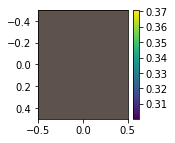

In [74]:
get_plot(get_color_from_text('green grass'))

Colors predicted:  [0.3499405 0.333139  0.3169205]


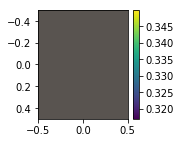

In [52]:
get_plot(get_color_from_text(colors_df[colors_df.name=='red'].iloc[0,:].context))


In [53]:
get_color_from_text(colors_df[colors_df.name=='black'].iloc[0,:].context)

Colors predicted:  [0.36713243 0.33056155 0.30230603]


array([0.36713243, 0.33056155, 0.30230603], dtype=float32)

Colors predicted:  [0.35620162 0.334905   0.30889338]


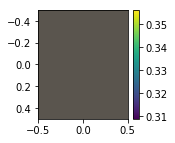

In [54]:
get_plot(get_color_from_text('find the reason to do what you want to do'))

Colors predicted:  [0.36949682 0.32953995 0.30096325]


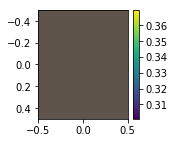

In [55]:
get_plot(get_color_from_text('find '))

In [56]:
from nltk import tokenize
def get_chunks(text):
    sentences = tokenize.sent_tokenize(text)
    colors = [get_color_from_text(s) for s in sentences]
    return colors

In [57]:
data = get_chunks('I am here. Find it. find the reason to do what you want to do.')

Colors predicted:  [0.36795253 0.33067563 0.30137184]
Colors predicted:  [0.36949682 0.32953995 0.30096325]
Colors predicted:  [0.35620162 0.334905   0.30889338]


In [58]:
import mpl_toolkits.axes_grid1 as axes_grid1
#np.random.seed(1)

#data = np.random.randn(10, 10)

def plot_all_text(data):
    
    fig = plt.figure(figsize=(15,5))
    grid = axes_grid1.AxesGrid(
        fig, 111, nrows_ncols=(1, 1), axes_pad = 0.5, cbar_location = "right",
        cbar_mode="each", cbar_size="15%", cbar_pad="5%",)

    #im0 = grid[0].imshow(data, cmap='gray', interpolation='nearest')
    #im0 = grid[0].imshow(data, cmap='gray', interpolation='nearest')
    #grid.cbar_axes[0].colorbar(im0)

    im1 = grid[0].imshow(data, cmap='jet', interpolation='nearest')
    grid.cbar_axes[0].colorbar(im1)
    plt.savefig('/tmp/test.png', bbox_inches='tight', pad_inches=0.0, dpi=200,)

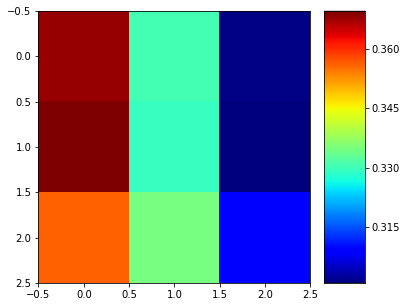

In [59]:
plot_all_text(data)

In [60]:
from nltk.book import *
moby = nltk.Text(gutenberg.sents('melville-moby_dick.txt'))
#moby.collocations()
moby.tokens[0]

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']']

In [61]:
' '.join(remove_stop_punct(moby.tokens[0]))

'moby dick herman melville'

In [62]:
#moby = [remove_stop_punct((' '.join(s))) for s in moby]
moby_sents = [' '.join(remove_stop_punct(s)) for s in moby.tokens]

In [63]:
moby[0]

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']']

In [67]:
moby_text ='. '.join(moby_sents[:15])
moby_text

'moby dick herman melville. etymology. supplied late consumptive usher grammar school. pale usher threadbare coat heart body brain see. ever dusting old lexicons grammars queer handkerchief mockingly embellished gay flags known nations world. loved dust old grammars somehow mildly reminded mortality. take hand school others teach name whale fish called tongue leaving ignorance letter h almost alone maketh signification word deliver true. hackluyt. whale. sw dan. hval. animal named roundness rolling dan. hvalt arched vaulted. webster dictionary. whale'

In [68]:
chunks = get_chunks(moby_text)

Colors predicted:  [0.35650262 0.3335453  0.30995205]
Colors predicted:  [0.36915386 0.32956135 0.3012848 ]
Colors predicted:  [0.34999862 0.3361806  0.3138208 ]
Colors predicted:  [0.3475986  0.33851603 0.31388533]
Colors predicted:  [0.34894213 0.3336509  0.31740698]
Colors predicted:  [0.35391936 0.33454555 0.31153503]
Colors predicted:  [0.34965616 0.3352912  0.3150526 ]
Colors predicted:  [0.36704752 0.33015957 0.3027929 ]
Colors predicted:  [0.36925605 0.3301678  0.3005762 ]
Colors predicted:  [0.36999595 0.32960194 0.30040213]
Colors predicted:  [0.3704066  0.32948956 0.3001038 ]
Colors predicted:  [0.35393453 0.33387786 0.3121876 ]
Colors predicted:  [0.3599763  0.33304173 0.30698198]
Colors predicted:  [0.35946992 0.33436    0.30617005]
Colors predicted:  [0.36925605 0.3301678  0.3005762 ]


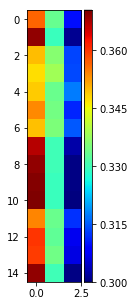

In [69]:
plot_all_text(chunks)

Colors predicted:  [0.36699983 0.3305624  0.30243775]


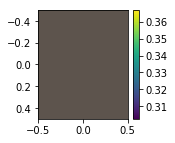

In [72]:
get_plot(get_color_from_text('blue'))

In [75]:
word_embds = model.layers[0].get_weights() #get the word embeddings

In [78]:
word_list = []
for word, i in t.word_index.items():
    word_list.append(word)

In [89]:
X_embedded = TSNE(n_components=2).fit_transform(word_embds[0])
number_of_words = num_classes
trace = go.Scatter(
    x = X_embedded[0:number_of_words,0], 
    y = X_embedded[0:number_of_words, 1],
    mode = 'markers',
    text= word_list[0:number_of_words]
)
layout = dict(title= 't-SNE 1 vs t-SNE 2 for characters ',
              yaxis = dict(title='t-SNE 2'),
              xaxis = dict(title='t-SNE 1'),
              hovermode= 'closest')
fig = dict(data = [trace], layout= layout)
py.iplot(fig)

In [94]:
def text_to_colors(text, n):
    sents = nltk.sent_tokenize(text)   
    tokens = [nltk.tokenize.word_tokenize(s) for s in sents]
    #print(tokens)
    sents_nopunct = [' '.join(remove_stop_punct(s)) for s in tokens] 
    #print(sents_nopunct)
    temp_text = '. '.join(sents_nopunct[:n])
    chunks = get_chunks(temp_text)
    plot_all_text(chunks)

In [95]:
songs = pd.read_csv('songdata.csv')

In [96]:
songs = songs.sample(frac=1).reset_index(drop=True)#shuffle dataframe

In [97]:
song1 = songs.text[0].replace ('\n', '.')
song2 = songs.text[10].replace ('\n', '.')

Colors predicted:  [0.3705967  0.32916632 0.3002369 ]
Colors predicted:  [0.37068346 0.3292236  0.30009297]
Colors predicted:  [0.37070522 0.32911187 0.3001829 ]
Colors predicted:  [0.37099978 0.32896867 0.30003157]
Colors predicted:  [0.37053397 0.32927516 0.3001909 ]
Colors predicted:  [0.37053397 0.32927516 0.3001909 ]
Colors predicted:  [0.3705967  0.32916632 0.3002369 ]


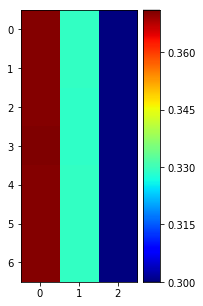

In [99]:
text_to_colors(song1, 15)


Colors predicted:  [0.37062553 0.32903755 0.30033696]
Colors predicted:  [0.37058988 0.32913196 0.3002782 ]


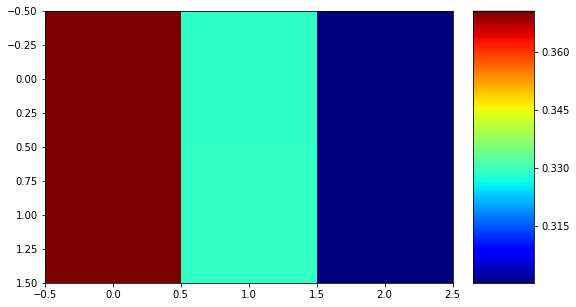

In [101]:
text_to_colors(song2, 2)